In [187]:
import numpy as np
import pygad
import json
import matplotlib.pyplot as plt
from nonograms import Nonogram

In [188]:
# def run_experiments(
#     nonograms,
#     fitness_funcs,
#     num_generations,
#     sol_per_pop,
#     mutation_percent_genes,
#     num_parents_mating,
# ):
#     results = {}
#     for fitness_func in fitness_funcs:
#         results[fitness_func] = []
#         for nonogram_data in nonograms:
#             columns = nonogram_data["columns"]
#             rows = nonogram_data["rows"]
#             sol = nonogram_data["solution"]
#             nonogram = Nonogram(columns, rows, sol)
#             result = nonogram.runGA(
#                 fitness_func,
#                 num_generations,
#                 sol_per_pop,
#                 mutation_percent_genes,
#                 num_parents_mating,
#             )
#             results[fitness_func].append(result)
#     return results

In [189]:
# non_duck = Nonogram(
#     [[1, 2], [3, 1], [1, 5], [7, 1], [5], [3], [4], [3], [0]],
#     [[3], [2, 1], [3, 2], [2, 2], [6], [1, 5], [6], [1], [2]],
# )

In [204]:
non_duck = Nonogram(
    [[3], [3], [1, 1], [7], [1, 3], [1, 1], [2, 2]],
    [[2], [1, 1], [2, 4], [5], [2, 4], [1, 1], [2]],
)

In [191]:
# non_duck = Nonogram(
#     [
#         [10],
#         [3, 3],
#         [2, 1, 1],
#         [1, 2, 1, 1],
#         [1, 2, 1],
#         [1, 2, 1],
#         [1, 2, 1, 1],
#         [2, 1, 2],
#         [3, 3],
#         [10],
#     ],
#     # [[10], [3, 3], [2, 2, 2], [1, 4, 1], [1, 1, 1, 1], [1, 1], [1, 1, 1, 1], [2, 1, 1, 2], [3, 3], [10]]
#     [[10], [3, 3], [2, 1, 1, 2], [1, 1, 1, 1], [1, 1], [1, 1, 1, 1], [1, 4, 1], [2, 2, 2], [3, 3], [10]],
# )

In [192]:
# num_generations = 5000
# sol_per_pop = 200
# mutation_percent_genes = 12
# num_parents_mating = 100

2024-06-18 13:56:23,212 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


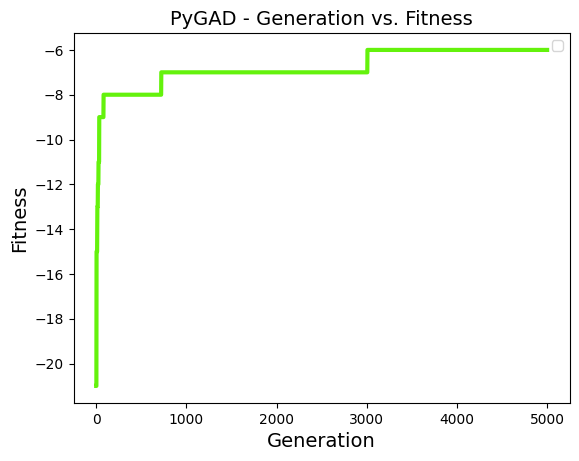

In [193]:
# res = non_duck.runGA(
#     "best_fit",
#     num_generations,
#     sol_per_pop,
#     mutation_percent_genes,
#     num_parents_mating,
# )

In [194]:
print(res)

{'best_solution_generation': 3007, 'solution_fitness': -6.0, 'solution': array([0., 7., 0., 0., 1., 6., 8., 7., 6., 9., 9., 9., 2., 3., 5., 4., 6.,
       2., 2., 9., 8., 0., 8., 0., 7., 0.])}


In [195]:
def plot_results(results):
    plt.figure(figsize=(14, 7))

    for fitness_func, data in results.items():
        generations = [result["best_solution_generation"] for result in data]
        fitness_values = [result["solution_fitness"] for result in data]
        plt.plot(generations, fitness_values, label=fitness_func)

    plt.xlabel("Nonogram Index")
    plt.ylabel("Fitness Value")
    plt.title("Comparison of Fitness Functions on Nonograms")
    plt.legend()
    plt.show()

In [196]:
def visualize_solution(solution, columns, rows):
    nonogram = Nonogram(columns, rows, solution)
    nonogram.visualize()

In [197]:
res["solution"]

array([0., 7., 0., 0., 1., 6., 8., 7., 6., 9., 9., 9., 2., 3., 5., 4., 6.,
       2., 2., 9., 8., 0., 8., 0., 7., 0.])

In [198]:
solution_vector = non_duck.vector_to_binary_grid(res["solution"], non_duck.rows, non_duck.columns)
solution_grid = non_duck.from_vector(solution_vector)

In [199]:
solution_grid

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

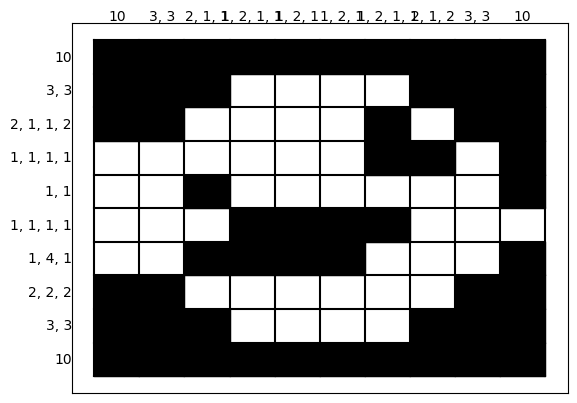

In [200]:
visualize_solution(solution_grid, non_duck.columns, non_duck.rows)

In [201]:
# # run experiment 100 times and get average generation number to find best solution

# best_fit = []
# num_solutions = 0

# for i in range(100):
#     res = non_duck.runGA(
#         "best_fit",
#         num_generations,
#         sol_per_pop,
#         mutation_percent_genes,
#         num_parents_mating,
#     )
#     print(res["best_solution_generation"])
#     best_fit.append(res["best_solution_generation"])
#     if res["best_solution_generation"] < 3000:
#         num_solutions += 1

# print(np.mean(best_fit))
# print(num_solutions)

In [202]:
# #### Run Experiments ####

# nonograms = [
#     non_duck, non_5
# ]

# fitness_funcs = [
#     "fitness",
#     "fitness_advanced",
#     "fitness_another",
#     "best_fit",
# ]

# num_generations = [100, 500, 1000]

# for fitness_func in fitness_funcs:
#     print(f"Running {fitness_func}...")
#     for nonogram in nonograms:
#         print(f"Running {nonogram}...")
#         for num_gen in num_generations:
#             print(f"Running {num_gen}...")
#             res = nonogram.runGA(
#                 fitness_func,
#                 num_gen,
#                 sol_per_pop,
#                 mutation_percent_genes,
#                 num_parents_mating,
#             )
#             print(res)

In [230]:
non = Nonogram(
    [[3], [1, 3], [1, 1], [2, 1], [1]],
    [[4], [1], [2], [2], [4]]
)

In [245]:
res2 = non.runSwarm("fitness", 10000, 1.5, 0.8, 0.9, 2, 2)

In [246]:
res2

{'best_solution_generation': 1034,
 'solution_fitness': 3.0,
 'solution': array([[1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 0, 0]])}

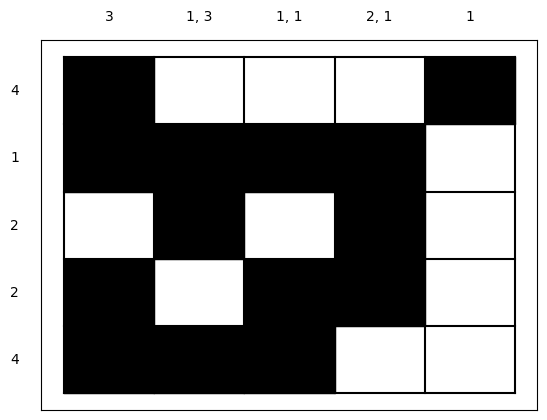

In [247]:
visualize_solution(res2["solution"], non.columns, non.rows)

In [242]:
def convert_solution_to_grid(self, solution):
    grid = np.zeros((len(self.rows), len(self.columns)), dtype=int)

    solution = np.round(solution).astype(int)
    iterator = 0

    for i, row_blocks in enumerate(self.rows):
        for block in row_blocks:
            start_pos = solution[iterator]
            iterator += 1
            if start_pos + block <= len(self.columns):
                grid[i, start_pos : start_pos + block] = 1

    return grid

In [243]:
sol = convert_solution_to_grid(non, res2["solution"])

In [244]:
sol

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

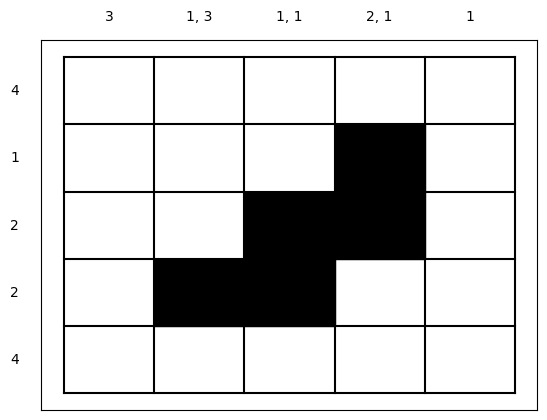

In [236]:
visualize_solution(sol, non.columns, non.rows)